In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255 # 사진데이터 표준화 255, 모든 픽셀값을 0~255
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2)

4431872/4422102 [==============================] - 0s 0us/step


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5282 - accuracy: 0.8124 - val_loss: 0.4107 - val_accuracy: 0.8573
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.8604 - val_loss: 0.3922 - val_accuracy: 0.8565
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.8730 - val_loss: 0.3846 - val_accuracy: 0.8648
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8807 - val_loss: 0.3609 - val_accuracy: 0.8724
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3203 - accuracy: 0.8863 - val_loss: 0.3910 - val_accuracy: 0.8690
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3079 - accuracy: 0.8905 - val_loss: 0.3623 - val_accuracy: 0.8774
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3014 - accuracy: 0.8935 - val_loss: 0.3775 - val_accuracy:

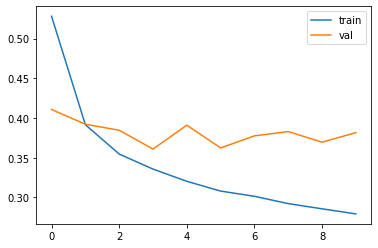

In [6]:
model = keras.Sequential() # 인공신경망을 그리기 위한 도화지

model.add(keras.layers.Flatten(input_shape=(28,28))) # 사진데이터를 쭉 펴준다. 일자모양
model.add(keras.layers.Dense(100,activation='relu')) # 100개의 은닉층으로 보낸다. 활성화 함수 relu 사용한다.(미분할때기울기 값을 없애지 않기위해)
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층 옷 종류 10개 , 출력층이 다중분류 softmax
# 어떻게 학습할지?
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs = 10,validation_data=(val_scaled,val_target))
# 쪽지시험 val_accuracy , val_loss 값
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()
# 잘내려가다가 과다 적합된 모습을 모임.

In [4]:
#학습이 다 끝나면 바로 평가해주는 방법
model.evaluate(val_scaled,val_target)



375/375 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8784


[0.3826713562011719, 0.8784166574478149]

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6599 - accuracy: 0.7674 - val_loss: 0.4393 - val_accuracy: 0.8454
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5124 - accuracy: 0.8224 - val_loss: 0.4194 - val_accuracy: 0.8471
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4872 - accuracy: 0.8346 - val_loss: 0.4504 - val_accuracy: 0.8418
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4877 - accuracy: 0.8350 - val_loss: 0.4053 - val_accuracy: 0.8648
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4818 - accuracy: 0.8403 - val_loss: 0.4061 - val_accuracy: 0.8656
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4773 - accuracy: 0.8428 - val_loss: 0.4204 - val_accuracy: 0.8577
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4810 - accuracy: 0.8468 - val_loss: 0.4247 - val_accuracy:

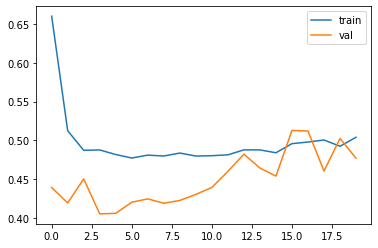

In [10]:
# < 드롭 아웃 >

model = keras.Sequential() # 인공신경망을 그리기 위한 도화지

model.add(keras.layers.Flatten(input_shape=(28,28))) # 사진데이터를 쭉 펴준다. 일자모양
model.add(keras.layers.Dense(100,activation='relu')) # 100개의 은닉층으로 보낸다. 활성화 함수 relu 사용한다.(미분할때기울기 값을 없애지 않기위해)
# 드롭 아웃 = 인공 신경망의 50%를 끄는 것
# 은닉층이 100개 엿는데 랜덤으로 반이 꺼짐
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층 옷 종류 10개 , 출력층이 다중분류 softmax
# 어떻게 학습할지?
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled,val_target)) 
# 쪽지시험 val_accuracy , val_loss 값


import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()
# 잘내려가다가 과다 적합된 모습을 모임.

In [ ]:
# 과대적합되는 모습을 보이지만 아까보다 많이 나아짐.....좋아짐...4번째 학습부터 과대 학습...

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6760 - accuracy: 0.7641 - val_loss: 0.4601 - val_accuracy: 0.8291
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5152 - accuracy: 0.8219 - val_loss: 0.4303 - val_accuracy: 0.8472
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4946 - accuracy: 0.8300 - val_loss: 0.4069 - val_accuracy: 0.8576
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8340 - val_loss: 0.4310 - val_accuracy: 0.8542
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4868 - accuracy: 0.8402 - val_loss: 0.4071 - val_accuracy: 0.8603


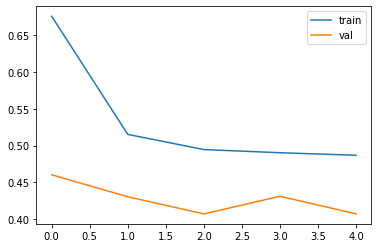

In [13]:
# < 콜백 >


model = keras.Sequential() # 인공신경망을 그리기 위한 도화지

model.add(keras.layers.Flatten(input_shape=(28,28))) # 사진데이터를 쭉 펴준다. 일자모양
model.add(keras.layers.Dense(100,activation='relu')) # 100개의 은닉층으로 보낸다. 활성화 함수 relu 사용한다.(미분할때기울기 값을 없애지 않기위해)
# 드롭 아웃 = 인공 신경망의 50%를 끄는 것
# 은닉층이 100개 엿는데 랜덤으로 반이 꺼짐
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층 옷 종류 10개 , 출력층이 다중분류 softmax
# 어떻게 학습할지?
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint=keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience =2, restore_best_weights=True) # 2번이상 좋지 않으면 끝내겠다


history = model.fit(train_scaled, train_target, epochs = 100, validation_data=(val_scaled,val_target),callbacks=[checkpoint,early_stopping]) 
# 쪽지시험 val_accuracy , val_loss 값


import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()
# 잘내려가다가 과다 적합된 모습을 모임.

In [ ]:
#체크 포인트는 val 값을 기준으로 보고 최상의 상태에서 계속 저장한 상태..
# best.h5 저장 됨